# Кейс-чемпионат GPN Intelligence CUP 2020

### Участник: Кольца Артем
https://t.me/artemkoltsa


https://github.com/artemkoltsa/GPN_CUP_clust

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns
from datetime import timedelta, date

from sklearn.cluster import KMeans

In [2]:
#загрузка данных о ПРОДАЖАХ
df_sales = pd.read_parquet('sales.parquet')
df_sales

,date,shop_id,owner,number_of_counters,goods_type,total_items_sold
0,2146-01-01,0,Рейдеры,4,Съедобный хлам,6.0
1,2146-01-01,0,Рейдеры,4,Хлам,26.0
2,2146-01-01,0,Рейдеры,4,Бензак,10537.0
3,2146-01-01,1,Рейдеры,5,Съедобный хлам,17.0
4,2146-01-01,1,Рейдеры,5,Хлам,9.0
...,...,...,...,...,...,...
5081454,2147-12-31,844,Рейдеры,10,Жидкости для тачки,52.0
5081455,2147-12-31,844,Рейдеры,10,Оружие,82.0
5081456,2147-12-31,844,Рейдеры,10,Броня и одежда,19.0
5081457,2147-12-31,844,Рейдеры,10,Бензак,43071.0


# Графики высоких и низких продаж

In [3]:
# df_sales_date = df_sales.groupby(['date', 'shop_id'])
# df_sales_date.first().mean()

df_sales_date = df_sales.groupby('date').mean()
df_sales_date = df_sales_date.reset_index()
df_sales_date_grafik = df_sales_date.drop(df_sales_date[(df_sales_date.date < '2147-01-01') | (df_sales_date.date > '2147-03-01')].index)

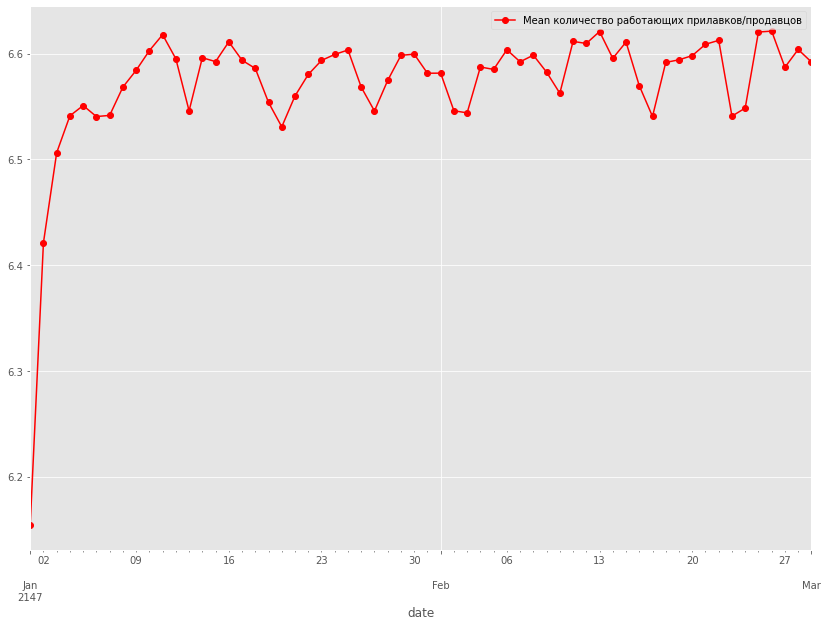

In [4]:
# кол-во продавцов/лавок
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
df_sales_date_grafik.plot(x='date', y='number_of_counters', label='Mean количество работающих прилавков/продавцов', 
                    rot=0, figsize=(14, 10), grid=True, marker='o', color='r')
plt.show()

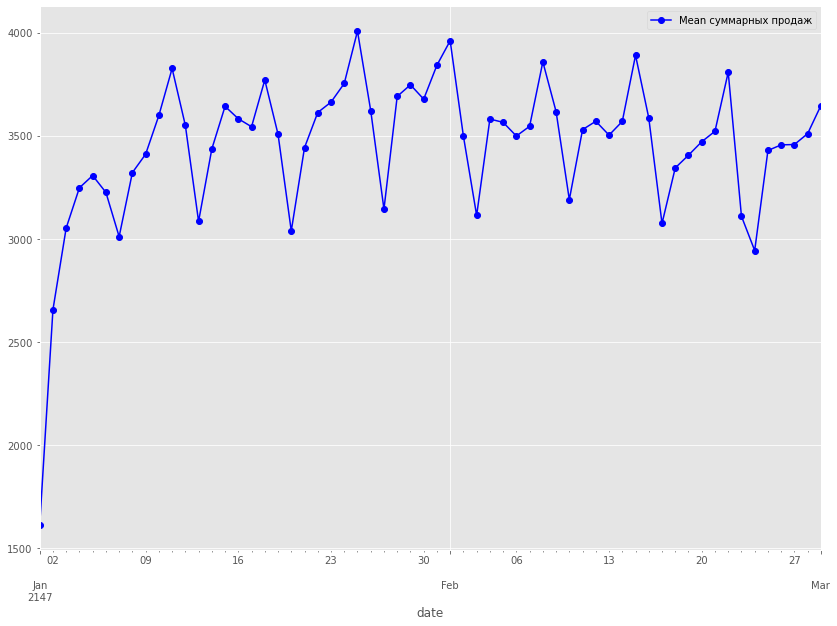

In [5]:
# кол-во суммарное кол-во продаж
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

df_sales_date_grafik.plot(x='date', y='total_items_sold', label='Mean cуммарных продаж', 
                    rot=0, figsize=(14, 10), grid=True, marker='o', color='b')
plt.show()

# Отбор по датам, где максимальная сумма продаж

In [8]:
# даты в столбец индексов
df_sales.index = df_sales.date

In [9]:
# data_matrix = []
# matrix = []
df_max_sum = pd.DataFrame()
d = date(2146, 1, 5)
end_date = date(2147, 12, 31)
delta = timedelta(days=7)
while d <= end_date:
#     if pd.Series(df_sales_date.date == str(d.strftime("%Y-%m-%d"))).any():
    inf_sales_max = pd.DataFrame(np.array(df_sales.loc[str(d.strftime("%Y-%m-%d"))]))
    df_max_sum = df_max_sum.append(inf_sales_max)
    
#         data_matrix.append(d.strftime("%Y-%m-%d"))
#         matrix.append(inf_sales)        
    print (d.strftime("'%Y-%m-%d'"))
    d += delta

'2146-01-05'
'2146-01-12'
'2146-01-19'
'2146-01-26'
'2146-02-02'
'2146-02-09'
'2146-02-16'
'2146-02-23'
'2146-03-02'
'2146-03-09'
'2146-03-16'
'2146-03-23'
'2146-03-30'
'2146-04-06'
'2146-04-13'
'2146-04-20'
'2146-04-27'
'2146-05-04'
'2146-05-11'
'2146-05-18'
'2146-05-25'
'2146-06-01'
'2146-06-08'
'2146-06-15'
'2146-06-22'
'2146-06-29'
'2146-07-06'
'2146-07-13'
'2146-07-20'
'2146-07-27'
'2146-08-03'
'2146-08-10'
'2146-08-17'
'2146-08-24'
'2146-08-31'
'2146-09-07'
'2146-09-14'
'2146-09-21'
'2146-09-28'
'2146-10-05'
'2146-10-12'
'2146-10-19'
'2146-10-26'
'2146-11-02'
'2146-11-09'
'2146-11-16'
'2146-11-23'
'2146-11-30'
'2146-12-07'
'2146-12-14'
'2146-12-21'
'2146-12-28'
'2147-01-04'
'2147-01-11'
'2147-01-18'
'2147-01-25'
'2147-02-01'
'2147-02-08'
'2147-02-15'
'2147-02-22'
'2147-03-01'
'2147-03-08'
'2147-03-15'
'2147-03-22'
'2147-03-29'
'2147-04-05'
'2147-04-12'
'2147-04-19'
'2147-04-26'
'2147-05-03'
'2147-05-10'
'2147-05-17'
'2147-05-24'
'2147-05-31'
'2147-06-07'
'2147-06-14'
'2147-06-21'

In [10]:
# переименование столбцов
df_max_sum.columns = ['date', 'shop_id', 'owner', 'number_of_counters', 'goods_type', 'total_items_sold']
# изменение тип данных столбцам
df_max_sum['shop_id'] = df_max_sum['shop_id'].astype(np.int64)
df_max_sum['number_of_counters'] = df_max_sum['number_of_counters'].astype(np.int64)
df_max_sum['total_items_sold'] = df_max_sum['total_items_sold'].astype(np.int64)

df_max_sum

,date,shop_id,owner,number_of_counters,goods_type,total_items_sold
0,2146-01-05,0,Рейдеры,4,Съедобный хлам,18
1,2146-01-05,0,Рейдеры,4,Хлам,6
2,2146-01-05,0,Рейдеры,4,Бензак,18456
3,2146-01-05,1,Рейдеры,5,Съедобный хлам,12
4,2146-01-05,1,Рейдеры,5,Хлам,9
...,...,...,...,...,...,...
6994,2147-12-27,844,Рейдеры,10,Модификации тачки,10
6995,2147-12-27,844,Рейдеры,10,Жидкости для тачки,17
6996,2147-12-27,844,Рейдеры,10,Броня и одежда,79
6997,2147-12-27,844,Рейдеры,10,Бензак,45363


In [11]:
# СТАТИСТИКА В ДНИ МАКСИМАЛЬНЫХ ПРОДАЖ
df_max_sum.groupby('shop_id').describe()

number_of_counters                                                     \
                     count       mean       std   min   25%   50%   75%   max   
shop_id                                                                         
0                    133.0   4.000000  0.000000   4.0   4.0   4.0   4.0   4.0   
1                    419.0   5.019093  0.338330   3.0   5.0   5.0   5.0   6.0   
2                    874.0   3.990847  0.095289   3.0   4.0   4.0   4.0   4.0   
3                    501.0   4.000000  0.000000   4.0   4.0   4.0   4.0   4.0   
4                    980.0   9.946939  0.305283   8.0  10.0  10.0  10.0  10.0   
...                    ...        ...       ...   ...   ...   ...   ...   ...   
840                 1068.0   5.971910  0.165307   5.0   6.0   6.0   6.0   6.0   
841                  996.0   8.000000  0.000000   8.0   8.0   8.0   8.0   8.0   
842                 1015.0   9.979310  0.142413   9.0  10.0  10.0  10.0  10.0   
843                  999.0   6.000000  0.000000   6.0   6.0   6.0   6.0   6.0   
844                  985.0  10.000000  0.000000  10.0  10.0  10.0  10.0  10.0   

        total_items_sold                                                      \
                   count          mean           std   min      25%      50%   
shop_id                                                                        
0                  133.0  13970.210526   7871.054088   2.0  12276.0  16717.0   
1                  419.0   4116.897375   6174.004541   0.0     13.0     86.0   
2                  874.0   1902.310069   4034.749345   0.0     26.0    107.0   
3                  501.0   7897.319361  13777.049826   0.0     24.0     59.0   
4                  980.0   4465.721429  10750.898180 -77.0     49.0    215.5   
...                  ...           ...           ...   ...      ...      ...   
840               1068.0   3357.853933   8088.535581   0.0     67.0    210.0   
841                996.0   4032.555221   9710.801162 -10.0     52.0    207.0   
842               1015.0   4788.537931  11096.877915   0.0     79.0    426.0   
843                999.0   4850.544545  11909.283456   0.0     70.0    260.0   
844                985.0   5985.749239  14471.890569   0.0     66.0    249.0   

                            
              75%      max  
shop_id                     
0        19774.00  24309.0  
1         5323.00  21579.0  
2         1273.00  18399.0  
3         4226.00  46864.0  
4         1361.25  54499.0  
...           ...      ...  
840        621.75  46877.0  
841       1025.25  44853.0  
842       1295.00  50016.0  
843       1600.00  51705.0  
844        882.00  67045.0  

[845 rows x 16 columns]

# Отбор по датам, где минимальная сумма продаж

In [12]:
# data_matrix = []
# matrix = []
df_min_sum = pd.DataFrame()
d = date(2146, 1, 7)
end_date = date(2147, 12, 31)
delta = timedelta(days=7)
while d <= end_date:
#     if pd.Series(df_sales_date.date == str(d.strftime("%Y-%m-%d"))).any():
    inf_sales_min = pd.DataFrame(np.array(df_sales.loc[str(d.strftime("%Y-%m-%d"))]))
    df_min_sum = df_min_sum.append(inf_sales_min)
    
#         data_matrix.append(d.strftime("%Y-%m-%d"))
#         matrix.append(inf_sales)        
    print (d.strftime("'%Y-%m-%d'"))
    d += delta

'2146-01-07'
'2146-01-14'
'2146-01-21'
'2146-01-28'
'2146-02-04'
'2146-02-11'
'2146-02-18'
'2146-02-25'
'2146-03-04'
'2146-03-11'
'2146-03-18'
'2146-03-25'
'2146-04-01'
'2146-04-08'
'2146-04-15'
'2146-04-22'
'2146-04-29'
'2146-05-06'
'2146-05-13'
'2146-05-20'
'2146-05-27'
'2146-06-03'
'2146-06-10'
'2146-06-17'
'2146-06-24'
'2146-07-01'
'2146-07-08'
'2146-07-15'
'2146-07-22'
'2146-07-29'
'2146-08-05'
'2146-08-12'
'2146-08-19'
'2146-08-26'
'2146-09-02'
'2146-09-09'
'2146-09-16'
'2146-09-23'
'2146-09-30'
'2146-10-07'
'2146-10-14'
'2146-10-21'
'2146-10-28'
'2146-11-04'
'2146-11-11'
'2146-11-18'
'2146-11-25'
'2146-12-02'
'2146-12-09'
'2146-12-16'
'2146-12-23'
'2146-12-30'
'2147-01-06'
'2147-01-13'
'2147-01-20'
'2147-01-27'
'2147-02-03'
'2147-02-10'
'2147-02-17'
'2147-02-24'
'2147-03-03'
'2147-03-10'
'2147-03-17'
'2147-03-24'
'2147-03-31'
'2147-04-07'
'2147-04-14'
'2147-04-21'
'2147-04-28'
'2147-05-05'
'2147-05-12'
'2147-05-19'
'2147-05-26'
'2147-06-02'
'2147-06-09'
'2147-06-16'
'2147-06-23'

In [13]:
# переименование столбцов
df_min_sum.columns = ['date', 'shop_id', 'owner', 'number_of_counters', 'goods_type', 'total_items_sold']
# изменение тип данных столбцам
df_min_sum['shop_id'] = df_min_sum['shop_id'].astype(np.int64)
df_min_sum['number_of_counters'] = df_min_sum['number_of_counters'].astype(np.int64)
df_min_sum['total_items_sold'] = df_min_sum['total_items_sold'].astype(np.int64)

df_min_sum

,date,shop_id,owner,number_of_counters,goods_type,total_items_sold
0,2146-01-07,0,Рейдеры,4,Съедобный хлам,3
1,2146-01-07,0,Рейдеры,4,Хлам,20
2,2146-01-07,0,Рейдеры,4,Броня и одежда,2
3,2146-01-07,0,Рейдеры,4,Бензак,16167
4,2146-01-07,1,Рейдеры,5,Съедобный хлам,10
...,...,...,...,...,...,...
6988,2147-12-29,844,Рейдеры,10,Модификации тачки,72
6989,2147-12-29,844,Рейдеры,10,Жидкости для тачки,20
6990,2147-12-29,844,Рейдеры,10,Броня и одежда,306
6991,2147-12-29,844,Рейдеры,10,Бензак,44042


In [14]:
# СТАТИСТИКА В ДНИ МИНИМАЛЬНЫХ ПРОДАЖ
df_min_sum.groupby('shop_id').describe()

number_of_counters                                                   \
                     count      mean       std  min   25%   50%   75%   max   
shop_id                                                                       
0                    130.0  4.007692  0.087706  4.0   4.0   4.0   4.0   5.0   
1                    408.0  5.022059  0.331779  4.0   5.0   5.0   5.0   6.0   
2                    844.0  3.979858  0.140570  3.0   4.0   4.0   4.0   4.0   
3                    492.0  4.000000  0.000000  4.0   4.0   4.0   4.0   4.0   
4                    968.0  9.881198  0.351298  8.0  10.0  10.0  10.0  10.0   
...                    ...       ...       ...  ...   ...   ...   ...   ...   
840                 1046.0  5.957935  0.200834  5.0   6.0   6.0   6.0   6.0   
841                  982.0  8.000000  0.000000  8.0   8.0   8.0   8.0   8.0   
842                 1010.0  9.944554  0.228961  9.0  10.0  10.0  10.0  10.0   
843                  985.0  6.000000  0.000000  6.0   6.0   6.0   6.0   6.0   
844                  993.0  9.922457  0.337551  6.0  10.0  10.0  10.0  10.0   

        total_items_sold                                                      \
                   count          mean           std  min       25%      50%   
shop_id                                                                        
0                  130.0  11665.776923   6561.589393  0.0  11619.75  14446.0   
1                  408.0   3101.419118   4650.057839  0.0     19.00    429.5   
2                  844.0   1484.017773   3088.617848  0.0     24.00    103.0   
3                  492.0   6539.016260  11322.543800  0.0     22.75     63.0   
4                  968.0   3461.547521   8690.095519  0.0     34.75    180.5   
...                  ...           ...           ...  ...       ...      ...   
840               1046.0   2703.385277   6688.278682  0.0     60.00    184.5   
841                982.0   3058.005092   7557.053211  0.0     54.00    183.5   
842               1010.0   3591.523762   8576.037788  0.0     76.25    347.0   
843                985.0   3579.689340   8930.899630  0.0     61.00    202.0   
844                993.0   4821.408862  12050.666281  0.0     67.00    259.0   

                            
              75%      max  
shop_id                     
0        16033.50  21404.0  
1         6126.00  16277.0  
2          965.75  15065.0  
3         3443.25  40483.0  
4          884.25  52104.0  
...           ...      ...  
840        490.00  41273.0  
841        730.50  40283.0  
842        965.00  44474.0  
843        990.00  47490.0  
844        710.00  62210.0  

[845 rows x 16 columns]

#  Cумма продаж в максимальные и минимальные дни

In [15]:
# cумма продаж в максимальные дни продажи
df_share_max = pd.DataFrame(df_max_sum.groupby(['shop_id', 'goods_type'])['total_items_sold'].sum())
df_share_max.columns = ['value']

df_share_max.columns = ['_'.join(col) for col in df_share_max.columns.values]
df_share_max = df_share_max.reset_index()
df_share_max.columns = ['shop_id','goods_type','value']
df_share_max = df_share_max.pivot_table(index='shop_id', columns='goods_type', values='value', aggfunc='sum')
df_share_max.columns = [''.join(col) for col in df_share_max.columns.values]
df_share_max = df_share_max.reset_index()
df_share_max = df_share_max.fillna(0)
df_share_max

,shop_id,Бензак,Броня и одежда,Жидкости для тачки,Медпрепараты и еда,Модификации тачки,Оружие,Патроны,Солярка,Съедобный хлам,Хлам,Ядер-Кола
0,0,1857571.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,196.0,254.0,0.0
1,1,1501563.0,237.0,80.0,0.0,0.0,0.0,0.0,219088.0,3075.0,937.0,0.0
2,2,1297332.0,3109.0,723.0,551.0,941.0,375.0,105164.0,220869.0,19054.0,6960.0,7541.0
3,3,3572113.0,96.0,2033.0,0.0,0.0,0.0,0.0,374706.0,4932.0,2677.0,0.0
4,4,3625856.0,2138.0,2424.0,6453.0,3139.0,122.0,129859.0,521182.0,46935.0,12933.0,25366.0
...,...,...,...,...,...,...,...,...,...,...,...,...
840,840,2816722.0,8537.0,2678.0,16099.0,4112.0,2003.0,66687.0,585578.0,39596.0,17636.0,26540.0
841,841,3236446.0,4043.0,2988.0,12831.0,2350.0,2205.0,90603.0,582337.0,43741.0,15059.0,23822.0
842,842,3737966.0,7489.0,6318.0,34621.0,5076.0,4069.0,111691.0,788566.0,82447.0,18423.0,63700.0
843,843,3996643.0,7255.0,2637.0,18299.0,2797.0,3809.0,138537.0,572075.0,56410.0,15881.0,31351.0


In [16]:
# сумма продаж в минимальные дни продажи
df_share_min = pd.DataFrame(df_min_sum.groupby(['shop_id', 'goods_type'])['total_items_sold'].sum())
df_share_min.columns = ['value']

df_share_min.columns = ['_'.join(col) for col in df_share_min.columns.values]
df_share_min = df_share_min.reset_index()
df_share_min.columns = ['shop_id','goods_type','value']
df_share_min = df_share_min.pivot_table(index='shop_id', columns='goods_type', values='value', aggfunc='sum')
df_share_min.columns = [''.join(col) for col in df_share_min.columns.values]
df_share_min = df_share_min.reset_index()
df_share_min = df_share_min.fillna(0)
df_share_min

,shop_id,Бензак,Броня и одежда,Жидкости для тачки,Медпрепараты и еда,Модификации тачки,Оружие,Патроны,Солярка,Съедобный хлам,Хлам,Ядер-Кола
0,0,1516212.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0,183.0,0.0
1,1,1104914.0,135.0,100.0,0.0,0.0,0.0,0.0,156023.0,3493.0,714.0,0.0
2,2,988746.0,2642.0,453.0,380.0,761.0,672.0,79561.0,152970.0,15286.0,4684.0,6356.0
3,3,2918052.0,103.0,2271.0,0.0,0.0,12.0,0.0,289718.0,4884.0,2151.0,5.0
4,4,2910434.0,1821.0,2467.0,4047.0,2078.0,112.0,86017.0,277129.0,35790.0,10308.0,20575.0
...,...,...,...,...,...,...,...,...,...,...,...,...
840,840,2314001.0,7475.0,2389.0,12502.0,3676.0,2085.0,47850.0,364807.0,35528.0,16098.0,21330.0
841,841,2523729.0,4750.0,3060.0,10298.0,2408.0,2479.0,62467.0,322342.0,38047.0,12654.0,20727.0
842,842,2895728.0,7771.0,6577.0,26339.0,4465.0,5094.0,77491.0,466632.0,69935.0,13592.0,53815.0
843,843,2973078.0,6800.0,2775.0,11983.0,2265.0,2990.0,84298.0,364372.0,39633.0,13645.0,24155.0


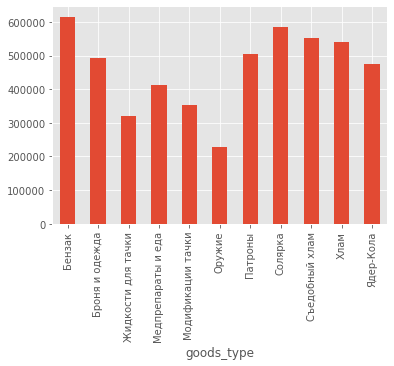

In [17]:
# количество типов товаров
plt.clf()
df_sales.groupby('goods_type').size().plot(kind='bar')
plt.show()

In [18]:
# топ 5 товаров
top5_share_min = df_share_min[['Бензак', 'Солярка', 'Съедобный хлам', 'Хлам', 'Патроны']]
top5_share_max = df_share_max[['Бензак', 'Солярка', 'Съедобный хлам', 'Хлам', 'Патроны']]

top5_share_min = top5_share_min.fillna(0)
top5_share_max = top5_share_max.fillna(0)

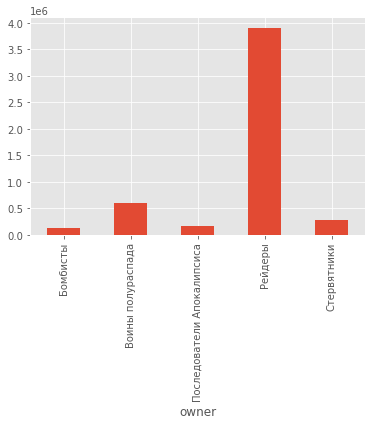

In [19]:
# количество владельцев и у кого больше магазинов
plt.clf()
df_sales.groupby('owner').size().plot(kind='bar')
plt.show()

In [20]:
# минимальное, максимальное и среднее значение, суммарные продажи по каждому типу товора

grouped_df = df_sales.groupby('goods_type').agg({'total_items_sold':['min','max','mean']})
grouped_df.columns = ['_'.join(col) for col in grouped_df.columns.values]
grouped_df = grouped_df.reset_index()
grouped_df

,goods_type,total_items_sold_min,total_items_sold_max,total_items_sold_mean
0,Бензак,0.0,244347.0,23313.754646
1,Броня и одежда,-924.0,3964.0,64.681525
2,Жидкости для тачки,-52.0,5154.0,59.062379
3,Медпрепараты и еда,-86.0,5803.0,220.563088
4,Модификации тачки,-263.0,1885.0,52.145212
5,Оружие,-359.0,1610.0,43.379132
6,Патроны,-5955.0,24160.0,777.784641
7,Солярка,-1659.0,90554.0,5542.048827
8,Съедобный хлам,-119.0,7655.0,422.550400
9,Хлам,-157.0,6693.0,121.968584


# 1. Признаки в макс. и мин. дни продаж и товары в эти дни.

In [21]:
#загрузка данных о МАГАЗИНАХ и сортировка по shop_id
df_shops = pd.read_parquet('shops.parquet')
df_shops = df_shops.sort_values(by=['shop_id']) # сортировка по shop_id
df_shops = df_shops.drop(['neighborhood', 'city'], axis=1) #  удаление категориальных признаков связанные с местоположением
df_shops = df_shops.fillna(0) # замена None/Nan = 0
df_shops.tail()

,shop_id,year_opened,is_on_the_road,is_with_the_well,is_with_additional_services,shop_type
97,840,-1,да,0,0,0
671,841,-1,0,0,0,0
96,842,-1,0,0,0,0
204,843,-1,0,0,0,0
654,844,-1,0,0,0,0


In [22]:
df_shops = df_shops.replace('нет', 0) # меняем значения
df_shops = df_shops.replace('да', 1) # меняем значения
df_shops['year_opened'] = df_shops['year_opened'].replace(-1, 0) # меняем значения
df_shops['shop_type'] = df_shops['shop_type'].astype(np.int64) # изменение типа данных
df_shops['shop_id'] = df_shops['shop_id'].astype(np.int64) # изменение типа данных
df_shops['year_opened'] = df_shops['year_opened'].astype(np.int64) # изменение типа данных
df_shops

,shop_id,year_opened,is_on_the_road,is_with_the_well,is_with_additional_services,shop_type
259,0,2136,0,0,0,0
770,1,2115,0,0,0,0
592,2,2115,0,0,1,2
701,3,2092,0,0,0,3
628,4,2108,0,0,1,1
...,...,...,...,...,...,...
97,840,0,1,0,0,0
671,841,0,0,0,0,0
96,842,0,0,0,0,0
204,843,0,0,0,0,0


In [23]:
# сумма В ДНИ МАКСИМАЛЬНЫХ ПРОДАЖ по каждому магазину - кол-во продавцов и суммарных продаж
sum_max = df_max_sum.groupby('shop_id').sum()
# добавление в датафрейм
df_shops['sum_MAX_number_of_counters'] = sum_max.values[:, 0]
df_shops['sum_MAX_total_items_sold'] = sum_max.values[:, 1]

# сумма В ДНИ МИНИМАЛЬНЫХ ПРОДАЖ по каждому магазину - кол-во продавцов и суммарных продаж
sum_min = df_min_sum.groupby('shop_id').sum()
# добавление в датафрейм
df_shops['sum_MIN_number_of_counters'] = sum_min.values[:, 0]
df_shops['sum_MIN_total_items_sold'] = sum_min.values[:, 1]

# сумма продаж в МАКСИМАЛЬНЫЕ ДНИ по товарам
# добавление в датафрейм
df_shops['MAX_Бензак'] = df_share_max.values[:, 1]
df_shops['MAX_Броня_и_одежда'] = df_share_max.values[:, 2]
df_shops['MAX_Жидкости_для_тачки'] = df_share_max.values[:, 3]
df_shops['MAX_Медпрепараты_и_еда'] = df_share_max.values[:, 4]
df_shops['MAX_Модификации_тачки'] = df_share_max.values[:, 5]
df_shops['MAX_Оружие'] = df_share_max.values[:, 6]
df_shops['MAX_Патроны'] = df_share_max.values[:, 7]
df_shops['MAX_Солярка'] = df_share_max.values[:, 8]
df_shops['MAX_Съедобный_хлам'] = df_share_max.values[:, 9]
df_shops['MAX_Хлам'] = df_share_max.values[:, 10]
df_shops['MAX_Ядер-Кола'] = df_share_max.values[:, 11]


# сумма продаж в МИНИМАЛЬНЫЕ ДНИ по товарам
# добавление в датафрейм
df_shops['MIN_Бензак'] = df_share_min.values[:, 1]
df_shops['MIN_Броня_и_одежда'] = df_share_min.values[:, 2]
df_shops['MIN_Жидкости_для_тачки'] = df_share_min.values[:, 3]
df_shops['MIN_Медпрепараты_и_еда'] = df_share_min.values[:, 4]
df_shops['MIN_Модификации_тачки'] = df_share_min.values[:, 5]
df_shops['MIN_Оружие'] = df_share_min.values[:, 6]
df_shops['MIN_Патроны'] = df_share_min.values[:, 7]
df_shops['MIN_Солярка'] = df_share_min.values[:, 8]
df_shops['MIN_Съедобный_хлам'] = df_share_min.values[:, 9]
df_shops['MIN_Хлам'] = df_share_min.values[:, 10]
df_shops['MIN_Ядер-Кола'] = df_share_min.values[:, 11]

df_shops

,shop_id,year_opened,is_on_the_road,is_with_the_well,is_with_additional_services,shop_type,sum_MAX_number_of_counters,sum_MAX_total_items_sold,sum_MIN_number_of_counters,sum_MIN_total_items_sold,...,MIN_Броня_и_одежда,MIN_Жидкости_для_тачки,MIN_Медпрепараты_и_еда,MIN_Модификации_тачки,MIN_Оружие,MIN_Патроны,MIN_Солярка,MIN_Съедобный_хлам,MIN_Хлам,MIN_Ядер-Кола
259,0,2136,0,0,0,0,532,1858038,521,1516551,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0,183.0,0.0
770,1,2115,0,0,0,0,2103,1724980,2049,1265379,...,135.0,100.0,0.0,0.0,0.0,0.0,156023.0,3493.0,714.0,0.0
592,2,2115,0,0,1,2,3488,1662619,3359,1252511,...,2642.0,453.0,380.0,761.0,672.0,79561.0,152970.0,15286.0,4684.0,6356.0
701,3,2092,0,0,0,3,2004,3956557,1968,3217196,...,103.0,2271.0,0.0,0.0,12.0,0.0,289718.0,4884.0,2151.0,5.0
628,4,2108,0,0,1,1,9748,4376407,9565,3350778,...,1821.0,2467.0,4047.0,2078.0,112.0,86017.0,277129.0,35790.0,10308.0,20575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,840,0,1,0,0,0,6378,3586188,6232,2827741,...,7475.0,2389.0,12502.0,3676.0,2085.0,47850.0,364807.0,35528.0,16098.0,21330.0
671,841,0,0,0,0,0,7968,4016425,7856,3002961,...,4750.0,3060.0,10298.0,2408.0,2479.0,62467.0,322342.0,38047.0,12654.0,20727.0
96,842,0,0,0,0,0,10129,4860366,10044,3627439,...,7771.0,6577.0,26339.0,4465.0,5094.0,77491.0,466632.0,69935.0,13592.0,53815.0
204,843,0,0,0,0,0,5994,4845694,5910,3525994,...,6800.0,2775.0,11983.0,2265.0,2990.0,84298.0,364372.0,39633.0,13645.0,24155.0


In [25]:
df_shops_finish = df_shops.drop(['shop_id', 'year_opened', 'is_on_the_road', 'is_with_the_well', 'is_with_additional_services'], axis=1)

In [26]:
df_shops_finish.describe()

,shop_type,sum_MAX_number_of_counters,sum_MAX_total_items_sold,sum_MIN_number_of_counters,sum_MIN_total_items_sold,MAX_Бензак,MAX_Броня_и_одежда,MAX_Жидкости_для_тачки,MAX_Медпрепараты_и_еда,MAX_Модификации_тачки,...,MIN_Броня_и_одежда,MIN_Жидкости_для_тачки,MIN_Медпрепараты_и_еда,MIN_Модификации_тачки,MIN_Оружие,MIN_Патроны,MIN_Солярка,MIN_Съедобный_хлам,MIN_Хлам,MIN_Ядер-Кола
count,845.000000,845.000000,8.450000e+02,845.000000,8.450000e+02,8.450000e+02,845.000000,845.000000,845.000000,845.000000,...,845.00000,845.000000,845.000000,845.000000,845.000000,845.000000,8.450000e+02,845.000000,845.000000,845.000000
mean,1.517160,5732.543195,3.475638e+06,5651.273373,2.851585e+06,2.684890e+06,5851.436686,3453.820118,17768.544379,3414.711243,...,5686.55503,3358.755030,15974.569231,3063.801183,1870.917160,54142.861538,4.139015e+05,40248.824852,10673.356213,29448.847337
std,1.132774,2837.553119,1.747086e+06,2797.695802,1.523042e+06,1.348685e+06,6502.273317,4075.998699,27692.656719,3872.635195,...,6437.91253,4391.995271,28217.831006,3544.976091,2594.641345,42356.637294,4.052266e+05,42070.756596,7510.973714,37299.537424
min,0.000000,414.000000,6.330660e+05,412.000000,3.715520e+05,4.785030e+05,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,3718.000000,2.222456e+06,3666.000000,1.728486e+06,1.740006e+06,760.000000,764.000000,0.000000,280.000000,...,611.00000,614.000000,0.000000,230.000000,73.000000,21163.000000,1.666060e+05,10016.000000,5057.000000,3929.000000
50%,1.000000,6020.000000,3.122405e+06,5971.000000,2.533481e+06,2.438405e+06,4209.000000,2290.000000,6453.000000,2345.000000,...,3924.00000,2065.000000,5194.000000,2056.000000,853.000000,52903.000000,3.074100e+05,28776.000000,10539.000000,17321.000000
75%,2.000000,7688.000000,4.353240e+06,7628.000000,3.604623e+06,3.440694e+06,8718.000000,4536.000000,23260.000000,5026.000000,...,8442.00000,4381.000000,19323.000000,4494.000000,2651.000000,77884.000000,5.309240e+05,55046.000000,15043.000000,40014.000000
max,4.000000,15021.000000,1.238058e+07,14434.000000,1.108199e+07,8.790068e+06,63376.000000,40384.000000,219088.000000,31292.000000,...,60010.00000,45114.000000,256252.000000,27140.000000,19145.000000,352833.000000,4.319536e+06,290906.000000,45907.000000,265135.000000


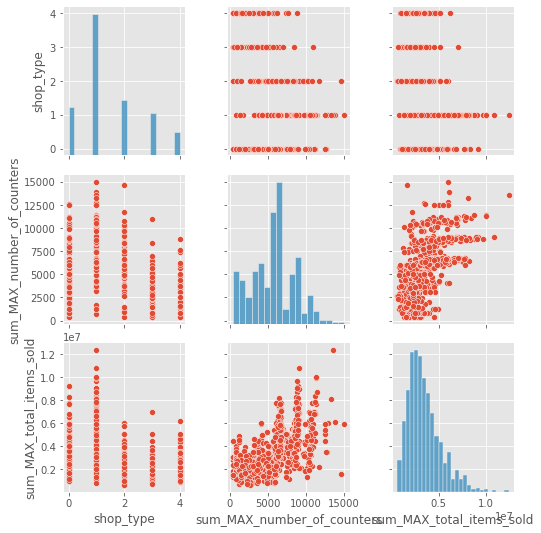

In [27]:
sns.pairplot(df_shops_finish[['shop_type', 'sum_MAX_number_of_counters', 'sum_MAX_total_items_sold']])

In [28]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df_shops_finish.values[:]
clus_dataset = StandardScaler().fit_transform(X)
clus_dataset

array([[-1.34012468, -1.83384168, -0.9264326 , ..., -0.95376404,
        -1.39749777, -0.78999071],
       [-1.34012468, -1.27986776, -1.00263766, ..., -0.87418426,
        -1.32675934, -0.78999071],
       [ 0.42649834, -0.7914821 , -1.03835308, ..., -0.59370477,
        -0.79788634, -0.61948553],
       ...,
       [-1.34012468,  1.55030069,  0.7930624 , ...,  0.70604284,
         0.38881408,  0.65364305],
       [-1.34012468,  0.09219621,  0.78465944, ..., -0.01464651,
         0.3958746 , -0.14201202],
       [-1.34012468,  1.45191831,  1.3861701 , ...,  0.07194943,
         0.88011978,  0.21235762]])

In [29]:
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init=12)
kmeans = k_means.fit(X)
labels = kmeans.labels_
print(labels)

[2 2 2 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 1 2 1 0 1 2 1 1 1 1 0 1 1 1 2 2 1 1 1
 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 0 1 2 2 2 2 2 1 0 1 1 1 1 2 2 2 2 1 2 1 2 2
 2 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 2 2 2 1 1 2 2 1 1 2 2 2 2 0 1 1 1 2 2 2 1 1 1 1 1 1 2 1 0 0 1 0 1 1
 2 2 1 1 1 1 2 2 2 2 2 1 1 1 2 1 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2
 0 2 2 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 0 0 2 1 1 2 2 1
 1 1 0 1 0 2 2 1 1 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1
 1 0 2 0 2 2 2 2 1 1 2 1 1 2 0 2 2 1 1 1 0 2 2 2 0 2 1 2 1 2 1 2 1 1 2 2 1
 1 1 1 2 0 2 1 1 0 1 1 1 2 0 2 2 1 0 1 2 0 0 0 0 2 1 1 1 1 0 1 0 2 0 0 1 0
 0 0 0 2 0 0 1 2 1 0 1 1 1 1 1 2 1 2 0 2 1 2 1 0 0 1 2 1 1 2 2 2 1 0 1 0 0
 0 0 0 1 1 0 1 2 0 1 1 1 2 1 0 2 2 1 1 1 0 1 2 0 0 0 1 2 1 2 1 2 0 1 1 0 1
 0 0 0 1 1 0 0 0 2 2 2 2 1 1 0 2 0 1 1 2 1 0 1 0 1 1 1 1 1 2 2 2 0 1 0 0 2
 0 0 2 1 1 2 1 0 1 1 1 1 2 1 2 1 2 1 1 0 2 2 0 0 1 2 1 1 0 2 1 2 2 1 1 2 2
 2 2 1 0 2 2 2 2 1 0 1 1 

In [30]:
from sklearn.cluster import KMeans

K = range(1,12)
wss = []
for k in K:
    k_means = KMeans(init = "k-means++", n_clusters = k)
    kmeans = k_means.fit(X)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [31]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,7.613569e+15
1,2,3.063273e+15
2,3,1.853036e+15
3,4,1.350350e+15
4,5,1.109961e+15
5,6,9.668913e+14
6,7,8.620531e+14
7,8,7.547047e+14
8,9,6.687335e+14
9,10,6.088998e+14


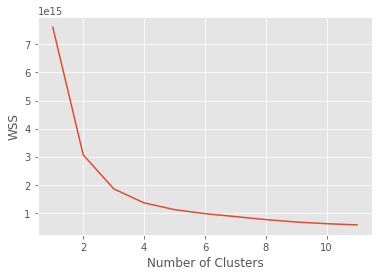

In [32]:
#Elbow Plot
plt.plot(K,wss)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

3

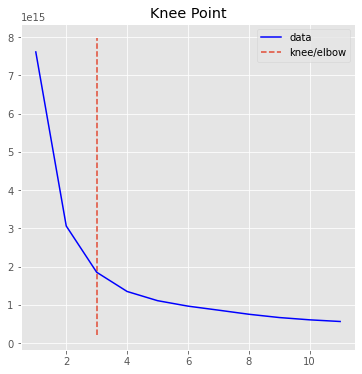

In [33]:
# Определение локтевой точки на кривой SSE не всегда просто, поэтому
# использовал пакет Python kneed, чтобы программно определить точку локтя:

from kneed import KneeLocator
kl = KneeLocator(K, wss, curve="convex", direction="decreasing")

kl.plot_knee()
kl.elbow

In [34]:
df_shops_finish["Clusters"] = labels
df_shops_finish.head(5)

,shop_type,sum_MAX_number_of_counters,sum_MAX_total_items_sold,sum_MIN_number_of_counters,sum_MIN_total_items_sold,MAX_Бензак,MAX_Броня_и_одежда,MAX_Жидкости_для_тачки,MAX_Медпрепараты_и_еда,MAX_Модификации_тачки,...,MIN_Жидкости_для_тачки,MIN_Медпрепараты_и_еда,MIN_Модификации_тачки,MIN_Оружие,MIN_Патроны,MIN_Солярка,MIN_Съедобный_хлам,MIN_Хлам,MIN_Ядер-Кола,Clusters
259,0,532,1858038,521,1516551,1857571.0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,147.0,183.0,0.0,2
770,0,2103,1724980,2049,1265379,1501563.0,237.0,80.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,156023.0,3493.0,714.0,0.0,2
592,2,3488,1662619,3359,1252511,1297332.0,3109.0,723.0,551.0,941.0,...,453.0,380.0,761.0,672.0,79561.0,152970.0,15286.0,4684.0,6356.0,2
701,3,2004,3956557,1968,3217196,3572113.0,96.0,2033.0,0.0,0.0,...,2271.0,0.0,0.0,12.0,0.0,289718.0,4884.0,2151.0,5.0,1
628,1,9748,4376407,9565,3350778,3625856.0,2138.0,2424.0,6453.0,3139.0,...,2467.0,4047.0,2078.0,112.0,86017.0,277129.0,35790.0,10308.0,20575.0,1


In [35]:
df_shops_finish["Clusters"].value_counts()

2    400
1    332
0    113
Name: Clusters, dtype: int64

In [36]:
df_shops_finish.groupby("Clusters").mean()

,shop_type,sum_MAX_number_of_counters,sum_MAX_total_items_sold,sum_MIN_number_of_counters,sum_MIN_total_items_sold,MAX_Бензак,MAX_Броня_и_одежда,MAX_Жидкости_для_тачки,MAX_Медпрепараты_и_еда,MAX_Модификации_тачки,...,MIN_Броня_и_одежда,MIN_Жидкости_для_тачки,MIN_Медпрепараты_и_еда,MIN_Модификации_тачки,MIN_Оружие,MIN_Патроны,MIN_Солярка,MIN_Съедобный_хлам,MIN_Хлам,MIN_Ядер-Кола
Clusters,,,,,,,,,,,,,,,,,,,,,
0,0.955752,8571.424779,6.777649e+06,8526.716814,5.708228e+06,5.117993e+06,15472.415929,8710.769912,39813.858407,8707.699115,...,15350.849558,9131.654867,34889.557522,7998.371681,5192.920354,107477.424779,916501.530973,88363.743363,19397.238938,61764.451327
1,1.274096,6429.054217,3.994861e+06,6356.472892,3.278189e+06,3.098267e+06,6665.409639,3951.358434,22192.939759,3985.966867,...,6506.707831,3783.722892,20210.096386,3545.093373,2175.756024,63029.177711,456189.560241,45840.608434,12289.593373,35167.939759
2,1.877500,4352.455000,2.111864e+06,4253.645000,1.690502e+06,1.654437e+06,2457.912500,1555.775000,7868.495000,1445.300000,...,2275.665000,1375.187500,7115.597500,1270.312500,679.435000,31700.205000,236817.877500,22015.180000,6867.382500,15572.842500


<AxesSubplot:xlabel='sum_MAX_number_of_counters', ylabel='sum_MAX_total_items_sold'>

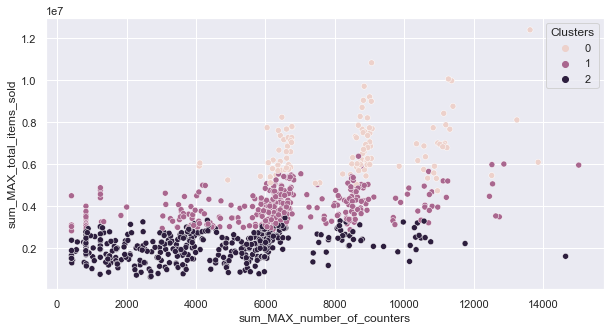

In [37]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(x='sum_MAX_number_of_counters',y='sum_MAX_total_items_sold', hue='Clusters', data=df_shops_finish)

<AxesSubplot:xlabel='sum_MIN_number_of_counters', ylabel='sum_MIN_total_items_sold'>

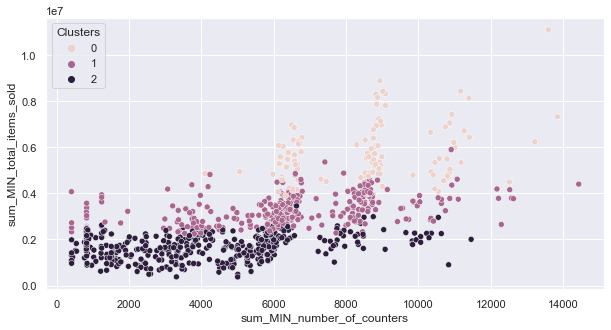

In [38]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(x='sum_MIN_number_of_counters',y='sum_MIN_total_items_sold', hue='Clusters', data=df_shops_finish)

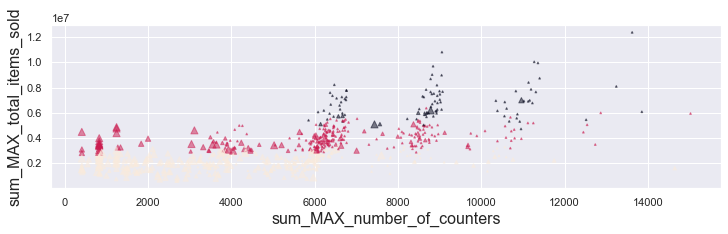

In [39]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
area = np.pi * (df_shops_finish.values[:,0])**2   #Features - shop_type
plt.scatter(df_shops_finish.values[:,1], df_shops_finish.values[:,2], s=area, c=labels.astype(np.float), alpha=0.5, marker='^')#Features - Age, Income
plt.xlabel('sum_MAX_number_of_counters', fontsize=16)
plt.ylabel('sum_MAX_total_items_sold', fontsize=16)

plt.show()

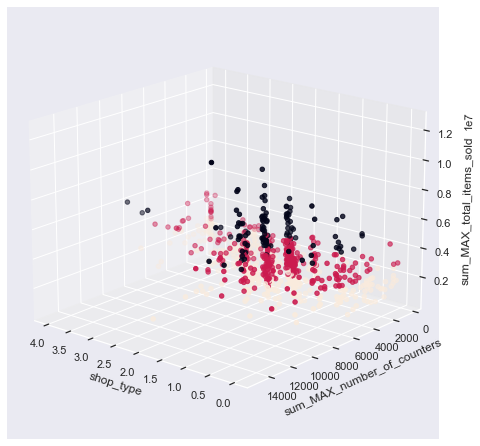

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=18, azim=130)

ax.set_xlabel('shop_type')
ax.set_ylabel('sum_MAX_number_of_counters')
ax.set_zlabel('sum_MAX_total_items_sold')

ax.scatter(df_shops_finish.values[:,0], df_shops_finish.values[:,1], df_shops_finish.values[:,2], c=labels.astype(np.float))

In [76]:
df_shops_finish

,shop_type,sum_MAX_number_of_counters,sum_MAX_total_items_sold,sum_MIN_number_of_counters,sum_MIN_total_items_sold,MAX_Бензак,MAX_Броня_и_одежда,MAX_Жидкости_для_тачки,MAX_Медпрепараты_и_еда,MAX_Модификации_тачки,...,MIN_Жидкости_для_тачки,MIN_Медпрепараты_и_еда,MIN_Модификации_тачки,MIN_Оружие,MIN_Патроны,MIN_Солярка,MIN_Съедобный_хлам,MIN_Хлам,MIN_Ядер-Кола,Clusters
259,0,532,1858038,521,1516551,1857571.0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,147.0,183.0,0.0,2
770,0,2103,1724980,2049,1265379,1501563.0,237.0,80.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,156023.0,3493.0,714.0,0.0,2
592,2,3488,1662619,3359,1252511,1297332.0,3109.0,723.0,551.0,941.0,...,453.0,380.0,761.0,672.0,79561.0,152970.0,15286.0,4684.0,6356.0,2
701,3,2004,3956557,1968,3217196,3572113.0,96.0,2033.0,0.0,0.0,...,2271.0,0.0,0.0,12.0,0.0,289718.0,4884.0,2151.0,5.0,1
628,1,9748,4376407,9565,3350778,3625856.0,2138.0,2424.0,6453.0,3139.0,...,2467.0,4047.0,2078.0,112.0,86017.0,277129.0,35790.0,10308.0,20575.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0,6378,3586188,6232,2827741,2816722.0,8537.0,2678.0,16099.0,4112.0,...,2389.0,12502.0,3676.0,2085.0,47850.0,364807.0,35528.0,16098.0,21330.0,1
671,0,7968,4016425,7856,3002961,3236446.0,4043.0,2988.0,12831.0,2350.0,...,3060.0,10298.0,2408.0,2479.0,62467.0,322342.0,38047.0,12654.0,20727.0,1
96,0,10129,4860366,10044,3627439,3737966.0,7489.0,6318.0,34621.0,5076.0,...,6577.0,26339.0,4465.0,5094.0,77491.0,466632.0,69935.0,13592.0,53815.0,1
204,0,5994,4845694,5910,3525994,3996643.0,7255.0,2637.0,18299.0,2797.0,...,2775.0,11983.0,2265.0,2990.0,84298.0,364372.0,39633.0,13645.0,24155.0,1


In [78]:
df_shops_finish.to_csv("prediction1.tsv", sep="\t")

# 2. Признаки такие, как за весь период, в макс. и мин. дни продаж.

In [81]:
#загрузка данных о МАГАЗИНАХ и сортировка по shop_id
df_shops = pd.read_parquet('shops.parquet')
df_shops = df_shops.sort_values(by=['shop_id']) # сортировка по shop_id
df_shops = df_shops.drop(['neighborhood', 'city'], axis=1) #  удаление категориальных признаков связанные с местоположением
df_shops = df_shops.fillna(0) # замена None/Nan = 0
df_shops.tail()

,shop_id,year_opened,is_on_the_road,is_with_the_well,is_with_additional_services,shop_type
97,840,-1,да,0,0,0
671,841,-1,0,0,0,0
96,842,-1,0,0,0,0
204,843,-1,0,0,0,0
654,844,-1,0,0,0,0


In [82]:
df_shops = df_shops.replace('нет', 0) # меняем значения
df_shops = df_shops.replace('да', 1) # меняем значения
df_shops['year_opened'] = df_shops['year_opened'].replace(-1, 0) # меняем значения
df_shops['shop_type'] = df_shops['shop_type'].astype(np.int64) # изменение типа данных
df_shops['shop_id'] = df_shops['shop_id'].astype(np.int64) # изменение типа данных
df_shops['year_opened'] = df_shops['year_opened'].astype(np.int64) # изменение типа данных
df_shops

,shop_id,year_opened,is_on_the_road,is_with_the_well,is_with_additional_services,shop_type
259,0,2136,0,0,0,0
770,1,2115,0,0,0,0
592,2,2115,0,0,1,2
701,3,2092,0,0,0,3
628,4,2108,0,0,1,1
...,...,...,...,...,...,...
97,840,0,1,0,0,0
671,841,0,0,0,0,0
96,842,0,0,0,0,0
204,843,0,0,0,0,0


In [83]:
# среднее значение по каждому магазину ЗА ВЕСЬ ПЕРИОД (2 года) - кол-во продавцов и суммарных продаж
df_sales_mean = df_sales.groupby('shop_id').mean()
# добавление в датафрейм
df_shops['mean_number_of_counters'] = df_sales_mean.values[:, 0]
df_shops['mean_total_items_sold'] = df_sales_mean.values[:, 1]

# среднее значение В ДНИ МАКСИМАЛЬНЫХ ПРОДАЖ по каждому магазину - кол-во продавцов и суммарных продаж
mean_max = df_max_sum.groupby('shop_id').mean()
# добавление в датафрейм
df_shops['mean_MAX_number_of_counters'] = mean_max.values[:, 0]
df_shops['mean_MAX_total_items_sold'] = mean_max.values[:, 1]

# среднее значение В ДНИ МИНИМАЛЬНЫХ ПРОДАЖ по каждому магазину - кол-во продавцов и суммарных продаж
mean_min = df_min_sum.groupby('shop_id').mean()
# добавление в датафрейм
df_shops['mean_MIN_number_of_counters'] = mean_min.values[:, 0]
df_shops['mean_MIN_total_items_sold'] = mean_min.values[:, 1]



# сумма по каждому магазину ЗА ВЕСЬ ПЕРИОД (2 года) - кол-во продавцов и суммарных продаж
df_sales_sum = df_sales.groupby('shop_id').sum()
# дабовление в датафрейм
df_shops['sum_number_of_counters'] = df_sales_sum.values[:, 0]
df_shops['sum_total_items_sold'] = df_sales_sum.values[:, 1]

# сумма В ДНИ МАКСИМАЛЬНЫХ ПРОДАЖ по каждому магазину - кол-во продавцов и суммарных продаж
sum_max = df_max_sum.groupby('shop_id').sum()
# добавление в датафрейм
df_shops['sum_MAX_number_of_counters'] = sum_max.values[:, 0]
df_shops['sum_MAX_total_items_sold'] = sum_max.values[:, 1]

# сумма В ДНИ МИНИМАЛЬНЫХ ПРОДАЖ по каждому магазину - кол-во продавцов и суммарных продаж
sum_min = df_min_sum.groupby('shop_id').sum()
# добавление в датафрейм
df_shops['sum_MIN_number_of_counters'] = sum_min.values[:, 0]
df_shops['sum_MIN_total_items_sold'] = sum_min.values[:, 1]



# количество уникальных товаров в каждом магазине
df_sales_uni_type = df_sales.groupby("shop_id")["goods_type"].nunique().to_frame()
# добавление в датафрейм
df_shops['uni_goods_type'] = df_sales_uni_type.values[:, 0]

df_shops



,shop_id,year_opened,is_on_the_road,is_with_the_well,is_with_additional_services,shop_type,mean_number_of_counters,mean_total_items_sold,mean_MAX_number_of_counters,mean_MAX_total_items_sold,mean_MIN_number_of_counters,mean_MIN_total_items_sold,sum_number_of_counters,sum_total_items_sold,sum_MAX_number_of_counters,sum_MAX_total_items_sold,sum_MIN_number_of_counters,sum_MIN_total_items_sold,uni_goods_type
259,0,2136,0,0,0,0,4.000000,12594.821622,4.000000,13970.210526,4.007692,11665.776923,3700.0,11650210.0,532,1858038,521,1516551,5
770,1,2115,0,0,0,0,5.018981,3745.175395,5.019093,4116.897375,5.022059,3101.419118,14279.0,10655024.0,2103,1724980,2049,1265379,6
592,2,2115,0,0,1,2,3.984816,1703.137827,3.990847,1902.310069,3.979858,1484.017773,23881.0,10206905.0,3488,1662619,3359,1252511,11
701,3,2092,0,0,0,3,4.000000,7371.321005,4.000000,7897.319361,4.000000,6539.016260,13844.0,25512142.0,2004,3956557,1968,3217196,9
628,4,2108,0,0,1,1,9.940336,4093.587600,9.946939,4465.721429,9.881198,3461.547521,68141.0,28061543.0,9748,4376407,9565,3350778,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,840,0,1,0,0,0,5.973616,3026.658507,5.971910,3357.853933,5.957935,2703.385277,43924.0,22255020.0,6378,3586188,6232,2827741,11
671,841,0,0,0,0,0,8.000000,3546.898610,8.000000,4032.555221,8.000000,3058.005092,54680.0,24243052.0,7968,4016425,7856,3002961,11
96,842,0,0,0,0,0,9.968522,4113.615968,9.979310,4788.537931,9.944554,3591.523762,69670.0,28750062.0,10129,4860366,10044,3627439,11
204,843,0,0,0,0,0,5.995092,4250.279446,6.000000,4850.544545,6.000000,3579.689340,41534.0,29445936.0,5994,4845694,5910,3525994,11


In [84]:
# просмотр тип данных столбцов
df_shops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 259 to 654
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   shop_id                      845 non-null    int64  
 1   year_opened                  845 non-null    int64  
 2   is_on_the_road               845 non-null    int64  
 3   is_with_the_well             845 non-null    int64  
 4   is_with_additional_services  845 non-null    int64  
 5   shop_type                    845 non-null    int64  
 6   mean_number_of_counters      845 non-null    float64
 7   mean_total_items_sold        845 non-null    float64
 8   mean_MAX_number_of_counters  845 non-null    float64
 9   mean_MAX_total_items_sold    845 non-null    float64
 10  mean_MIN_number_of_counters  845 non-null    float64
 11  mean_MIN_total_items_sold    845 non-null    float64
 12  sum_number_of_counters       845 non-null    float64
 13  sum_total_items_so

In [85]:
# проверка нулей
df_shops.isnull().any()

shop_id                        False
year_opened                    False
is_on_the_road                 False
is_with_the_well               False
is_with_additional_services    False
shop_type                      False
mean_number_of_counters        False
mean_total_items_sold          False
mean_MAX_number_of_counters    False
mean_MAX_total_items_sold      False
mean_MIN_number_of_counters    False
mean_MIN_total_items_sold      False
sum_number_of_counters         False
sum_total_items_sold           False
sum_MAX_number_of_counters     False
sum_MAX_total_items_sold       False
sum_MIN_number_of_counters     False
sum_MIN_total_items_sold       False
uni_goods_type                 False
dtype: bool

In [86]:
df_shops_ready = df_shops.drop('shop_id', axis=1) # удаляем столбец с id магазинов

In [87]:
# краткая статистика
df_shops_ready.describe()

,year_opened,is_on_the_road,is_with_the_well,is_with_additional_services,shop_type,mean_number_of_counters,mean_total_items_sold,mean_MAX_number_of_counters,mean_MAX_total_items_sold,mean_MIN_number_of_counters,mean_MIN_total_items_sold,sum_number_of_counters,sum_total_items_sold,sum_MAX_number_of_counters,sum_MAX_total_items_sold,sum_MIN_number_of_counters,sum_MIN_total_items_sold,uni_goods_type
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,8.450000e+02,845.000000,8.450000e+02,845.000000,8.450000e+02,845.000000
mean,1970.173964,0.265089,0.065089,0.442604,1.517160,6.334171,4327.070753,6.345107,4744.831122,6.307140,3898.890573,39708.687574,2.204827e+07,5732.543195,3.475638e+06,5651.273373,2.851585e+06,9.791716
std,559.694857,0.441642,0.246829,0.496989,1.132774,1.863928,3433.635037,1.877495,3737.618353,1.832169,3167.434307,19642.341869,1.122126e+07,2837.553119,1.747086e+06,2797.695802,1.523042e+06,2.559098
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.508346,773.081049,3.505429,870.909185,3.510020,451.099760,2901.000000,3.996222e+06,414.000000,6.330660e+05,412.000000,3.715520e+05,1.000000
25%,2116.000000,0.000000,0.000000,0.000000,1.000000,5.441433,2509.151216,5.486284,2767.886497,5.260260,2239.036757,25946.000000,1.405243e+07,3718.000000,2.222456e+06,3666.000000,1.728486e+06,10.000000
50%,2132.000000,0.000000,0.000000,0.000000,1.000000,5.998404,3473.180054,6.000000,3795.801015,6.000000,3119.483932,41628.000000,1.966978e+07,6020.000000,3.122405e+06,5971.000000,2.533481e+06,11.000000
75%,2139.000000,1.000000,0.000000,1.000000,2.000000,7.927268,4806.642370,7.960377,5296.786482,7.880597,4278.171456,53473.000000,2.774454e+07,7688.000000,4.353240e+06,7628.000000,3.604623e+06,11.000000
max,2143.000000,1.000000,1.000000,1.000000,4.000000,15.471051,40769.784932,16.180110,43195.307692,13.452004,39105.528846,103000.000000,8.148457e+07,15021.000000,1.238058e+07,14434.000000,1.108199e+07,11.000000


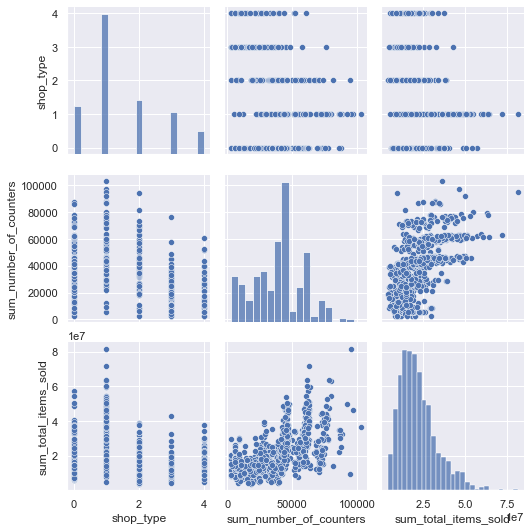

In [88]:
sns.pairplot(df_shops_ready[['shop_type', 'sum_number_of_counters', 'sum_total_items_sold']])

In [133]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df_shops_ready.values[:]
clus_dataset = StandardScaler().fit_transform(X)
clus_dataset

array([[ 0.29645483, -0.60059016, -0.2638565 , ..., -0.87707643,
        -1.8735326 ,  2.25618953],
       [ 0.25891217, -0.60059016, -0.2638565 , ..., -1.04208875,
        -1.48253851, -0.78687536],
       [ 0.25891217, -0.60059016, -0.2638565 , ..., -1.05054264,
         0.4724319 , -0.78687536],
       ...,
       [-3.52217062, -0.60059016, -0.2638565 , ...,  0.50971242,
         0.4724319 ,  0.73465709],
       [-3.52217062, -0.60059016, -0.2638565 , ...,  0.44306616,
         0.4724319 , -0.78687536],
       [-3.52217062, -0.60059016, -0.2638565 , ...,  1.27194147,
         0.4724319 ,  0.73465709]])

In [134]:
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init=12)
kmeans = k_means.fit(clus_dataset)
labels = kmeans.labels_
print(labels)

[1 2 2 2 0 2 2 2 2 2 2 1 2 2 2 0 2 2 2 2 1 0 0 1 2 2 2 0 0 2 2 2 1 2 2 0 2
 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 0 2 1 2 2 2 2 0 0 2 2 0 0 0 2 2 2 0 2 0 2 2
 2 2 2 2 2 0 2 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 0 2 0 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 2 0 0 2
 2 2 0 0 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 1 1 2 2 2 0 2 2 2 2 2 2 0 0 1 2 0 2 2 2
 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 1 2 2 2 2 1 1 2
 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 2 2 0 0 2 0 2 1 2 0 1 2 2 0 2 1 1 0 2 2 2 0
 2 2 2 0 0 0 2 0 0 2 0 0 2 0 2 2 0 0 0 1 0 0 0 0 0 2 2 0 0 0 2 0 1 0 0 2 0
 0 0 0 2 0 0 2 2 0 0 2 2 2 2 2 2 0 2 0 1 1 1 1 0 0 0 1 0 0 0 2 0 0 0 0 0 0
 0 2 2 0 0 0 2 1 0 1 0 2 2 2 2 2 2 0 0 0 0 2 2 0 0 0 2 0 2 0 1 2 0 2 2 0 2
 0 0 0 2 2 0 0 0 2 2 2 2 2 0 0 2 0 0 2 2 0 0 0 0 0 2 1 0 1 2 2 1 0 2 0 0 1
 0 0 1 2 0 2 0 0 2 2 1 0 1 1 1 2 2 2 0 0 1 1 0 0 0 0 0 0 0 2 0 2 0 2 2 2 0
 2 2 0 0 2 2 1 0 0 0 2 2 

In [135]:
from sklearn.cluster import KMeans

K = range(1,12)
wss = []
for k in K:
    k_means = KMeans(init = "k-means++", n_clusters = k)
    kmeans = k_means.fit(clus_dataset)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [136]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,16055.000000
1,2,11812.131686
2,3,8422.736781
3,4,7616.044683
4,5,6837.886703
5,6,6257.476012
6,7,5859.970879
7,8,5361.287516
8,9,4972.001136
9,10,4661.255658


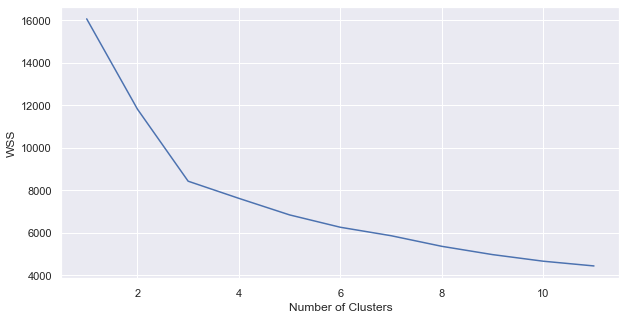

In [137]:
#Elbow Plot
plt.plot(K,wss)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

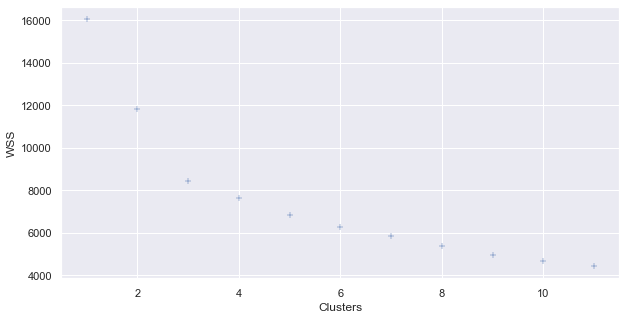

In [138]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

3

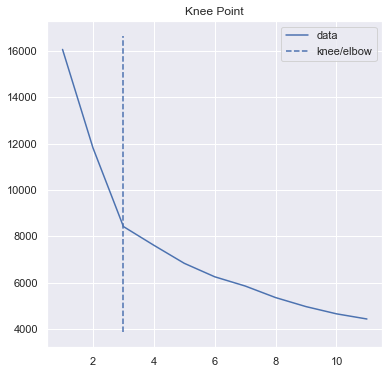

In [139]:
# Определение локтевой точки на кривой SSE не всегда просто, поэтому
# использовал пакет Python kneed, чтобы программно определить точку локтя:

from kneed import KneeLocator
kl = KneeLocator(K, wss, curve="convex", direction="decreasing")

kl.plot_knee()
kl.elbow

In [140]:
df_shops_ready["Clusters"] = labels
df_shops_ready.head(5)

,year_opened,is_on_the_road,is_with_the_well,is_with_additional_services,shop_type,mean_number_of_counters,mean_total_items_sold,mean_MAX_number_of_counters,mean_MAX_total_items_sold,mean_MIN_number_of_counters,mean_MIN_total_items_sold,sum_number_of_counters,sum_total_items_sold,sum_MAX_number_of_counters,sum_MAX_total_items_sold,sum_MIN_number_of_counters,sum_MIN_total_items_sold,uni_goods_type,Clusters
259,2136,0,0,0,0,4.000000,12594.821622,4.000000,13970.210526,4.007692,11665.776923,3700.0,11650210.0,532,1858038,521,1516551,5,1
770,2115,0,0,0,0,5.018981,3745.175395,5.019093,4116.897375,5.022059,3101.419118,14279.0,10655024.0,2103,1724980,2049,1265379,6,2
592,2115,0,0,1,2,3.984816,1703.137827,3.990847,1902.310069,3.979858,1484.017773,23881.0,10206905.0,3488,1662619,3359,1252511,11,2
701,2092,0,0,0,3,4.000000,7371.321005,4.000000,7897.319361,4.000000,6539.016260,13844.0,25512142.0,2004,3956557,1968,3217196,9,2
628,2108,0,0,1,1,9.940336,4093.587600,9.946939,4465.721429,9.881198,3461.547521,68141.0,28061543.0,9748,4376407,9565,3350778,11,0


In [141]:
df_shops_ready["Clusters"].value_counts()

2    485
0    283
1     77
Name: Clusters, dtype: int64

In [142]:
df_shops_ready.groupby("Clusters").mean()

,year_opened,is_on_the_road,is_with_the_well,is_with_additional_services,shop_type,mean_number_of_counters,mean_total_items_sold,mean_MAX_number_of_counters,mean_MAX_total_items_sold,mean_MIN_number_of_counters,mean_MIN_total_items_sold,sum_number_of_counters,sum_total_items_sold,sum_MAX_number_of_counters,sum_MAX_total_items_sold,sum_MIN_number_of_counters,sum_MIN_total_items_sold,uni_goods_type
Clusters,,,,,,,,,,,,,,,,,,
0,1944.067138,0.356890,0.162544,0.558304,0.992933,8.191020,4363.996155,8.213155,4760.691035,8.139932,3998.464267,60195.261484,3.229937e+07,8685.798587,5.067229e+06,8570.141343,4.246554e+06,10.922261
1,2131.857143,0.038961,0.000000,0.116883,3.077922,4.535107,12736.409811,4.537150,13959.784060,4.530767,11540.842419,6297.818182,1.663530e+07,898.571429,2.598787e+06,895.285714,2.145896e+06,2.727273
2,1959.738144,0.247423,0.018557,0.426804,1.575258,5.536314,2970.433647,5.542127,3272.584252,5.519719,2627.530475,33059.072165,1.692608e+07,4776.758763,2.686147e+06,4703.173196,2.149650e+06,10.253608


<AxesSubplot:xlabel='sum_MAX_number_of_counters', ylabel='sum_MAX_total_items_sold'>

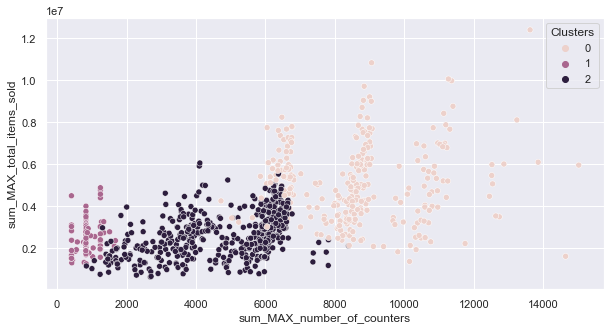

In [143]:
sns.scatterplot(x='sum_MAX_number_of_counters',y='sum_MAX_total_items_sold', hue='Clusters', data=df_shops_ready)

<AxesSubplot:xlabel='sum_MIN_number_of_counters', ylabel='sum_MIN_total_items_sold'>

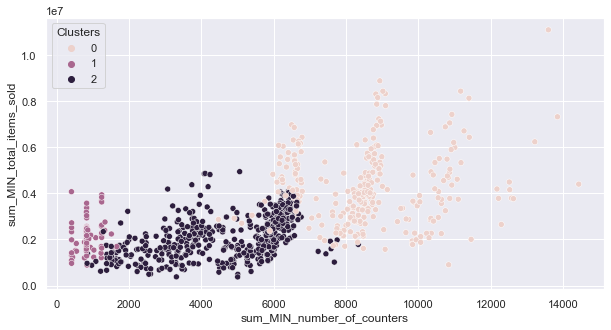

In [144]:
sns.scatterplot(x='sum_MIN_number_of_counters',y='sum_MIN_total_items_sold', hue='Clusters', data=df_shops_ready)

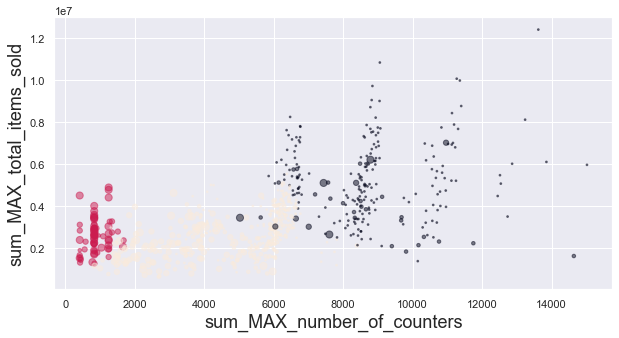

In [145]:
import matplotlib.pyplot as plt
area = np.pi * (df_shops_ready.values[:,4])**2   #Features - Edu
plt.scatter(df_shops_ready.values[:,13], df_shops_ready.values[:,14], s=area, c=labels.astype(np.float), alpha=0.5)#Features - Age, Income
plt.xlabel('sum_MAX_number_of_counters', fontsize=18)
plt.ylabel('sum_MAX_total_items_sold', fontsize=18)

plt.show()

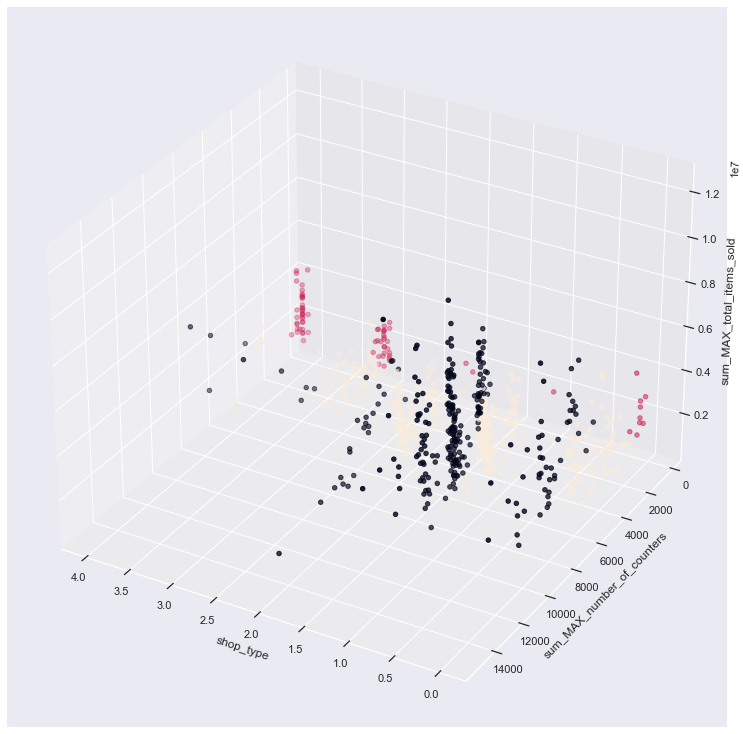

In [158]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(12,10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=120)

ax.set_xlabel('shop_type')
ax.set_ylabel('sum_MAX_number_of_counters')
ax.set_zlabel('sum_MAX_total_items_sold')

ax.scatter(df_shops_ready.values[:,4], df_shops_ready.values[:,13], df_shops_ready.values[:,14], c=labels.astype(np.float))

In [154]:
df_shops_ready.to_csv("prediction2.tsv", sep="\t")